In [245]:
import librosa
import soundfile as sf
import os
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq,ifft
from scipy import signal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [247]:
audio, sr = librosa.load("./data/Abdalrahman_ali/Abdalrahman_ali1.wav", duration=2)

In [248]:
librosa.feature.chroma_stft(y=audio, sr=sr).mean()


0.4348167

In [249]:
librosa.feature.chroma_stft(y=audio, sr=sr).var()

0.09270196

In [250]:
librosa.feature.rms(y=audio).mean()

0.07485168

In [251]:
librosa.feature.rms(y=audio).var()

0.008497177

In [252]:
mfcc = librosa.feature.mfcc(y=audio)
for i in range(len(mfcc)):
    print(f"mfcc{i}_mean: " + str(mfcc[i].mean()))
    print(f"mfcc{i}_var: " + str(mfcc[i].var()))

mfcc0_mean: -345.40894
mfcc0_var: 28028.982
mfcc1_mean: 110.775505
mfcc1_var: 5367.8022
mfcc2_mean: -3.2945318
mfcc2_var: 139.61432
mfcc3_mean: 19.635124
mfcc3_var: 329.22263
mfcc4_mean: 2.152603
mfcc4_var: 159.88531
mfcc5_mean: -6.2251434
mfcc5_var: 144.55289
mfcc6_mean: -8.515364
mfcc6_var: 154.331
mfcc7_mean: -2.0222752
mfcc7_var: 81.99715
mfcc8_mean: -1.2317331
mfcc8_var: 149.72127
mfcc9_mean: -4.355553
mfcc9_var: 127.81663
mfcc10_mean: 1.6914725
mfcc10_var: 45.187454
mfcc11_mean: -1.3301268
mfcc11_var: 66.830826
mfcc12_mean: -2.934381
mfcc12_var: 51.30114
mfcc13_mean: 1.6115537
mfcc13_var: 42.552006
mfcc14_mean: -0.5250415
mfcc14_var: 26.421867
mfcc15_mean: -1.8049588
mfcc15_var: 58.782665
mfcc16_mean: -3.2228758
mfcc16_var: 71.02134
mfcc17_mean: 2.4629574
mfcc17_var: 25.087776
mfcc18_mean: -3.329977
mfcc18_var: 31.930058
mfcc19_mean: 4.6411023
mfcc19_var: 22.025806


In [253]:
librosa.lpc(audio, order = 16).mean()

0.0010893687

In [254]:
df = pd.DataFrame(columns=['chroma_mean','chroma_var','rms_mean','rms_var','mfcc1_mean','mfcc1_var',
                           'mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var',
                           'mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var',
                           'mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var',
                           'mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var',
                           'mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var',
                           'mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var',
                           'mfcc20_mean','mfcc20_var',"result"
                          ])

In [255]:



dir_ = './data/'
original = list(os.listdir(dir_))
print(original)
for name in original:
    directory = dir_ + name
    audios = list(os.listdir(directory))
    for a in audios:
        audio, _ = librosa.load(f"./data/{name}/{a}", duration=2)
        
        features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                    librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var()]
        
        mfcc = librosa.feature.mfcc(y=audio)
        mfcc_list = []
        for i in range(len(mfcc)):
            mfcc_list.append(mfcc[i].mean())
            mfcc_list.append(mfcc[i].var())
        
        features = features + mfcc_list
        
        if name == "Amr":
            features.append(1)
        else:
            features.append(0)
        print(name)
        print(a)
        print(features)
        df.loc[len(df)] = features
        

['Abdalrahman_ali', 'Abdalrahman_yasser', 'Amr', 'Amr_ay_kalam', 'Elsarta', 'Ibrahim', 'Mariam_Wael', 'Mariam_Wael_close', 'Moheb', 'momen_mohamed', 'Neveen', 'Rawan']
Abdalrahman_ali
Abdalrahman_ali1.wav
[0.4348167, 0.09270196, 0.07485168, 0.008497177, -345.40894, 28028.982, 110.775505, 5367.8022, -3.2945318, 139.61432, 19.635124, 329.22263, 2.152603, 159.88531, -6.2251434, 144.55289, -8.515364, 154.331, -2.0222752, 81.99715, -1.2317331, 149.72127, -4.355553, 127.81663, 1.6914725, 45.187454, -1.3301268, 66.830826, -2.934381, 51.30114, 1.6115537, 42.552006, -0.5250415, 26.421867, -1.8049588, 58.782665, -3.2228758, 71.02134, 2.4629574, 25.087776, -3.329977, 31.930058, 4.6411023, 22.025806, 0]
Abdalrahman_ali
Abdalrahman_ali2.wav
[0.39725742, 0.09779848, 0.08248498, 0.012128077, -339.0674, 19279.041, 109.484634, 4972.4688, 5.0349073, 307.59045, 12.472975, 248.83583, 0.99830943, 214.08798, -5.672344, 259.23242, -6.010849, 93.23242, -4.14872, 97.0984, -4.3955946, 112.84073, -4.096697, 130.

Abdalrahman_yasser
Abdalrahman_yasser7.wav
[0.35907152, 0.09805128, 0.097690485, 0.008068473, -280.6656, 19948.807, 127.359215, 3298.0312, 4.9333797, 494.48935, 19.347775, 276.02277, 7.2382708, 229.77797, 1.6027535, 206.3323, -10.90339, 146.44185, -6.5765815, 138.59825, -13.208025, 135.46066, 1.2744296, 96.59963, -5.440904, 125.55117, 0.90438175, 121.97342, -2.469668, 76.22081, -5.34776, 70.74593, -3.8257475, 56.370495, 8.790363, 115.61768, -10.721097, 96.40582, -2.557944, 38.88022, -4.0117884, 31.904648, -0.11095161, 59.46082, 0]
Abdalrahman_yasser
Abdalrahman_yasser8.wav
[0.45427787, 0.09608335, 0.062218867, 0.010652778, -395.0138, 29745.9, 74.970055, 5862.717, 1.4325819, 262.6135, 9.755202, 188.51176, 2.6307247, 111.68759, 0.33464584, 150.79236, -0.6112471, 64.18928, -0.6915706, 65.44932, -10.895407, 260.7592, -0.8747795, 61.836857, -3.4437046, 67.98705, 0.19860975, 36.772907, -0.6761821, 46.29608, -0.18493605, 29.452406, -3.1969068, 69.18922, 5.585805, 101.19896, -3.635996, 59.7285

Amr
Amr23.wav
[0.3425042, 0.09434012, 0.024624346, 0.0013966674, -488.43143, 21363.443, 98.24497, 4702.891, 19.040636, 314.41214, 3.1795366, 632.99475, -14.924289, 203.18283, 4.8674455, 391.44995, -8.364978, 122.17569, -8.306067, 71.93836, -2.053538, 81.38477, -4.391109, 54.98223, -0.9500714, 68.86786, 2.2239347, 43.740715, 8.861016, 56.799305, 1.8003045, 39.26229, -3.3930588, 82.7364, 6.1029873, 103.61633, -0.089713074, 30.680868, -3.7118008, 52.199966, -0.64583814, 48.166763, -0.5718708, 22.24449, 1]
Amr
Amr24.wav
[0.33447352, 0.10128583, 0.030060234, 0.003027895, -448.2266, 15592.322, 103.82075, 4402.155, 19.495348, 162.98843, 2.7102609, 472.52124, -12.546338, 243.58374, 4.2219167, 386.37366, -9.262617, 106.46186, -8.132769, 84.7871, -0.99784255, 97.53814, -3.7660651, 39.22501, -0.62978286, 64.9531, 3.1142654, 58.921974, 8.790379, 42.559383, 2.5355766, 38.680897, -4.247194, 57.021927, 5.900446, 113.566574, 0.021121003, 24.404634, -3.388095, 67.21683, 1.1101949, 36.881756, -1.2080367

Amr
Amr4.wav
[0.3995579, 0.1007732, 0.018984128, 0.00062694715, -504.50476, 29166.08, 89.67972, 6557.357, -0.16251276, 196.36195, 8.609502, 389.04904, -4.6184688, 239.44427, -5.271439, 358.5984, 1.1444638, 286.1673, 4.8662667, 73.09957, -19.023125, 382.514, 2.2498372, 45.17749, 0.8902409, 103.72087, -1.4567082, 18.406866, 1.67077, 18.83286, -0.6438739, 30.33505, 0.12508066, 23.638319, 4.471279, 66.10694, -1.352141, 38.701153, -3.302916, 40.251842, -1.7289146, 9.99159, -0.21162145, 13.753099, 1]
Amr
Amr40.wav
[0.35054156, 0.09124208, 0.017155603, 0.0008849661, -498.5296, 17167.602, 97.7476, 3727.1013, 20.693068, 396.688, -2.1017618, 670.1319, -13.80893, 174.5767, 3.0173726, 293.36697, -4.300128, 74.327644, -8.468799, 82.25143, -5.43195, 53.835613, 0.2009251, 37.049034, -0.09476278, 83.545715, 3.6077108, 50.849228, 7.9876037, 56.046658, 3.7970455, 24.492783, -0.7882136, 33.108044, 2.720681, 73.46932, 1.338927, 25.827168, 0.060107835, 35.096844, -0.31814754, 22.757507, 0.7769216, 24.25275

Amr
Voice 007.wav
[0.3798687, 0.08115261, 0.02672146, 0.0010427648, -405.60974, 11820.418, 133.7951, 989.22064, 18.078506, 575.4919, -10.380953, 826.3635, -11.578108, 230.98538, 8.898769, 180.10013, -20.83526, 228.4472, -2.201682, 113.375626, -7.170264, 130.3878, -1.4206908, 107.74447, -8.641219, 200.06473, 9.78641, 43.097015, -3.286865, 68.397675, -2.8599546, 72.26585, 1.5662463, 57.8233, 2.7224154, 69.32232, -5.973703, 74.23657, 0.5481477, 70.97997, -0.9557892, 31.781263, -2.3497028, 16.580744, 1]
Amr
Voice 008.wav
[0.36401987, 0.08372836, 0.028699119, 0.0011230308, -425.71216, 11109.749, 158.25244, 379.9209, 21.213861, 234.45837, -24.623709, 457.98132, -18.409267, 252.75247, 17.479628, 507.66156, -20.374302, 750.7791, -2.594107, 131.87254, -11.761365, 61.143433, -10.130966, 68.88664, -6.444818, 125.38467, 1.680309, 88.791016, 2.5149992, 71.70692, -3.1987193, 69.698715, -1.9357053, 36.030346, 3.4494934, 62.379597, -1.5834205, 40.313736, -6.846211, 57.237064, -0.59075886, 27.162483, -

Amr
Voice 025.wav
[0.27718976, 0.08420385, 0.0177277, 0.00028105968, -414.44797, 10703.581, 149.36972, 590.8804, 1.6047065, 728.4822, -5.6575384, 436.00742, -12.245288, 212.88715, 6.242719, 237.897, -22.644522, 282.31573, -11.864794, 154.33058, -9.525403, 111.32264, -2.2801042, 33.592194, -3.2131824, 115.19079, -3.2017376, 115.13877, -0.6165903, 73.11523, -2.3996558, 51.189915, -3.7972667, 65.73491, 9.339773, 171.96494, -8.770581, 95.7999, -2.6956062, 40.002308, -3.8079658, 25.203684, -6.1752405, 39.802696, 1]
Amr
Voice 026.wav
[0.28117815, 0.08086865, 0.024509558, 0.00059675483, -397.96152, 11693.004, 152.93716, 549.1424, 6.723722, 516.2596, -10.246385, 419.82498, -13.283525, 163.80724, 5.9736695, 291.5829, -16.625542, 159.94098, -13.602989, 65.88088, -8.7630415, 91.312874, -2.6718183, 84.956085, -3.2702703, 153.54868, -2.3486435, 100.17305, 1.7425296, 65.33537, -4.0080934, 71.41853, -3.2062986, 40.550594, 10.56332, 169.05768, -9.313518, 82.46318, -4.6556325, 26.603975, -2.256085, 17.

Amr_ay_kalam
Amr_false13.wav
[0.55442536, 0.07099257, 0.017834907, 0.0007687009, -419.61807, 14371.351, 155.87459, 1203.282, 6.6471286, 238.26573, -28.767286, 337.65723, -6.2429724, 168.09549, 15.08563, 138.65703, -11.277077, 355.7908, -5.583522, 113.641716, -12.722734, 59.716568, 1.2319895, 63.259953, 0.009757831, 27.092066, -0.693059, 33.039604, -5.361825, 26.134863, -2.7181852, 35.632435, -0.7670065, 22.63047, 1.3919909, 27.275728, -6.7332525, 30.716475, -6.488198, 12.74905, -3.9032526, 13.021136, -3.6865218, 14.465401, 0]
Amr_ay_kalam
Amr_false14.wav
[0.50328255, 0.08717526, 0.026631657, 0.0011554838, -394.71417, 15221.7295, 150.0022, 2015.4003, 8.482089, 588.70044, -23.846704, 542.44525, -8.017968, 228.78096, 16.739382, 102.46425, -5.7345405, 124.30935, -2.3366714, 151.26149, -19.232769, 198.08914, 2.5526748, 68.26647, -4.74962, 75.22603, -3.2179706, 129.54903, -1.8591692, 73.05516, -4.903231, 52.60672, -7.415963, 65.423676, 3.9906163, 94.99062, -5.634623, 51.89072, -4.000989, 42.

Amr_ay_kalam
Voice 009.wav
[0.3847027, 0.08138585, 0.023206206, 0.00134835, -410.91263, 12726.741, 145.1019, 749.3386, 2.245952, 717.0893, -21.679468, 736.47424, -16.299421, 132.81029, 14.072438, 196.04745, -5.5253763, 206.12305, -7.9311996, 114.093864, -13.872546, 62.717724, -7.7046747, 39.862713, -3.5815861, 56.48283, -2.955868, 40.197548, 0.43896064, 18.468649, -1.7616138, 35.68461, -7.1784463, 19.704184, 0.7373602, 108.71818, -4.1707244, 61.38747, -4.283865, 57.485615, 0.99202096, 25.648064, -4.1209736, 22.899168, 0]
Amr_ay_kalam
Voice 010.wav
[0.32257268, 0.08883426, 0.03164033, 0.0018901508, -395.24927, 14816.89, 139.11165, 399.67224, 9.626646, 573.6935, -17.340456, 648.4361, -21.870407, 180.78908, 15.085755, 539.3599, -17.294266, 486.2459, -6.733903, 120.80939, -14.41172, 69.769615, -8.1058655, 48.78643, -0.35099414, 52.921124, 3.056595, 42.52181, 2.0284772, 24.062798, -3.1942048, 71.8814, -3.46321, 25.910107, 1.946362, 141.29335, -10.077369, 117.49394, -4.844651, 43.518723, 3.0

Ibrahim
open1.wav
[0.47614, 0.10422944, 0.055828907, 0.0055928407, -419.92798, 21119.387, 98.074, 5891.5884, 8.002031, 526.4548, 21.36654, 616.5875, 7.725635, 298.29904, 10.904455, 932.3997, 10.728004, 196.55463, 6.7923493, 113.74221, -5.2919664, 159.51738, 3.5292292, 73.962135, -1.0271744, 193.60234, 1.1120518, 68.29655, -1.3438647, 94.61278, 0.3113064, 153.77473, 9.205647, 47.497536, 0.20729125, 44.232338, 2.0590396, 36.167145, 8.446975, 102.4847, 7.1661587, 91.85883, -0.29353827, 51.691284, 0]
Ibrahim
open2.wav
[0.52513874, 0.13241568, 0.05236716, 0.0035218846, -433.99402, 22626.148, 95.36967, 7658.993, 12.160415, 633.7712, 24.421408, 771.5769, -4.3689747, 379.79996, -0.013684856, 1188.4845, 7.9751763, 361.41898, 2.3480825, 186.18951, -12.628683, 230.8973, -4.3121295, 127.8734, -9.649692, 187.2382, -0.3560549, 38.769905, -0.68866855, 72.625206, -5.904258, 107.44501, 4.46036, 71.25436, -3.3593793, 34.154644, -3.9033458, 34.90988, 1.3083856, 40.703117, 1.4168682, 48.002697, -2.6220217

Mariam_Wael
open2.wav
[0.43075532, 0.097531766, 0.011211546, 0.00023459889, -509.4557, 13615.894, 90.230316, 1667.808, 4.6099906, 198.78491, 15.248959, 467.1606, 8.666619, 448.1134, 18.53887, 111.454216, -1.8713856, 186.41577, 3.2268708, 117.86559, -4.2398677, 116.504906, -1.6226997, 46.77189, -11.189656, 38.52926, -8.617269, 51.095825, -14.357615, 74.01266, -2.503208, 59.55925, -8.608648, 35.28962, -6.771838, 51.71957, -2.3085794, 29.335033, -1.6905792, 42.08638, -4.5434685, 39.1622, -4.332141, 32.81534, 0]
Mariam_Wael
open3.wav
[0.33357078, 0.10608841, 0.016301824, 0.00020785263, -451.41705, 8615.489, 115.03939, 1514.3844, 10.176617, 398.29196, 6.2588983, 463.77618, -3.2235708, 457.2613, 5.2770677, 211.18246, -9.298843, 161.27248, 4.2508035, 88.697205, -4.340051, 123.20473, -0.97027683, 81.74027, -14.300697, 77.04611, -7.609194, 47.060413, -16.595932, 52.096535, 0.060275115, 82.25675, -12.26206, 55.55652, -4.831517, 42.6539, 0.98163533, 27.601406, 1.059964, 35.43324, -2.772543, 45.95

Mariam_Wael_close
close3.wav
[0.2761838, 0.10957365, 0.027598364, 0.000302209, -402.98004, 5918.4146, 114.7479, 2912.6335, 15.424878, 491.73407, 2.7925937, 857.2731, -10.662537, 722.8957, 15.248355, 249.7412, -2.3291311, 347.73538, -10.626718, 128.14862, -10.216209, 272.9125, -8.400486, 104.87187, -15.860354, 63.864365, -4.8300014, 78.1225, -13.876085, 86.8358, 2.0057175, 87.04074, -8.515227, 93.21646, -13.891775, 101.8097, -0.94075745, 88.5903, -3.173394, 45.16191, -3.3328915, 74.45434, -4.6425266, 25.660301, 0]
Mariam_Wael_close
close4.wav
[0.36679733, 0.11056394, 0.025071017, 0.0006287758, -427.05313, 13814.295, 90.49686, 2211.1328, 10.061103, 679.584, 10.194891, 746.4877, -2.2853222, 786.5309, 8.041323, 335.94687, 3.277719, 433.3302, -13.852485, 305.28195, -7.8360167, 251.94913, -1.7467885, 67.577225, -16.916967, 139.67249, -2.124637, 213.74348, -21.342497, 172.51466, 0.4506126, 148.83954, -6.0745115, 62.23346, -10.840455, 71.840645, 2.6242554, 135.0193, -3.3936143, 47.13005, -2.94

Moheb
Moheb5.wav
[0.4302547, 0.0904824, 0.050703816, 0.0068105194, -397.67426, 28398.19, 78.236084, 5108.7485, 0.77867186, 352.01288, 10.43105, 197.92958, 6.7410574, 177.90425, 1.8411114, 310.18555, -2.8761928, 103.762665, -4.062815, 53.166172, -10.812886, 171.67604, -1.498942, 44.946568, -3.4619675, 103.16713, 1.4137417, 33.64441, -3.5246246, 96.48755, -1.578473, 66.39951, 0.16657682, 28.930832, 7.635744, 104.62646, -2.3650835, 71.9601, 0.7874687, 22.398977, -0.67573476, 13.395007, 1.0269704, 21.239735, 0]
Moheb
Moheb6.wav
[0.46291786, 0.09951259, 0.059669457, 0.007726491, -382.55142, 26130.451, 83.30755, 5367.254, 4.3314147, 539.33484, 11.360666, 256.1083, 9.857768, 258.00354, 5.3672175, 334.4962, 3.221739, 148.59064, -4.1767983, 84.427704, -8.094179, 185.03284, 0.917602, 54.51009, -4.3139987, 110.70749, 2.0185719, 21.454174, -3.9124331, 120.183495, -3.0124145, 31.37591, 1.5557216, 47.079712, 5.978431, 70.93139, -3.2942603, 70.0622, 1.1709689, 19.605633, -1.2048606, 27.649517, 1.6184

Neveen
Neveen8.wav
[0.35008422, 0.09615596, 0.07882774, 0.016450506, -300.744, 13052.102, 115.52859, 1022.51416, 3.8802655, 471.49094, -2.1317208, 230.26172, -4.2813396, 527.31805, -1.748664, 142.30142, -12.014773, 141.4624, -17.964954, 78.0634, -6.7957406, 124.302734, 4.8207803, 55.97898, -1.3668679, 118.19428, 0.93119943, 64.20539, -7.545837, 138.68327, 10.456003, 105.015594, 2.693899, 86.173584, -4.856913, 48.63853, -1.9826016, 36.048668, -0.44112992, 46.863052, -2.3286762, 59.3936, -2.016629, 33.52892, 0]
Neveen
Neveen9.wav
[0.395912, 0.10339171, 0.08575563, 0.012019008, -301.92026, 18575.3, 128.80241, 1781.4501, -6.2487745, 466.3827, 0.2335761, 321.67938, -4.249222, 574.17456, -6.875813, 190.29631, -8.664894, 225.22476, -13.184073, 143.17873, -6.554798, 60.91448, 0.6587601, 61.576862, -4.6164136, 238.77295, 5.767236, 72.00645, -7.283955, 208.10803, 9.712023, 175.24876, -2.6393044, 52.685524, -4.466933, 60.71732, -0.07820968, 44.949303, -1.5382944, 38.695873, -1.1111995, 56.510147,

In [256]:
df = df.sample(frac=1)

In [257]:
df["result"].value_counts()

0.0    145
1.0     84
Name: result, dtype: int64

In [258]:
X = df.drop(columns = 'result', axis=1)

In [259]:
Y = df['result']

In [260]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
Y = df['result']

In [261]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=1)

In [262]:
from sklearn import preprocessing

y = df['result']
X = df.drop(columns = 'result', axis=1)

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.23687105, 0.1790032 ])

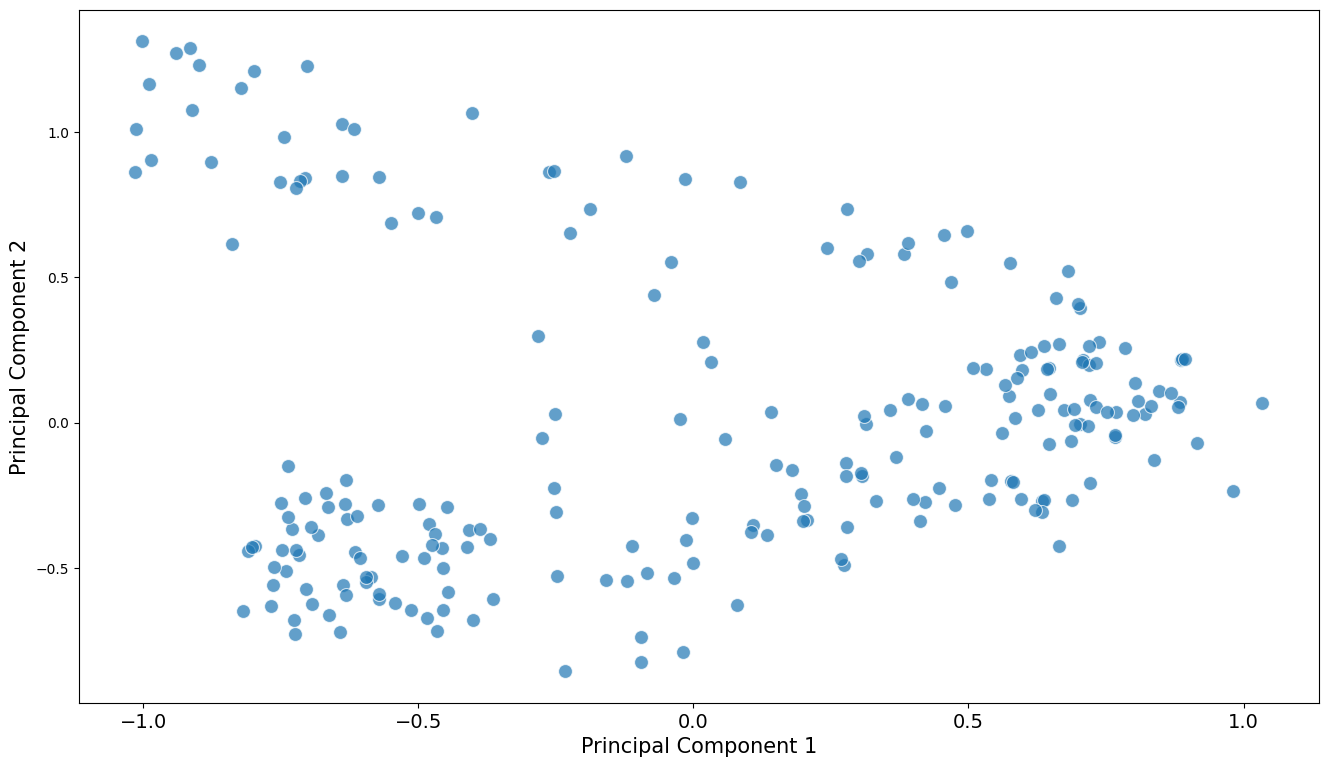

In [263]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, alpha = 0.7,
               s = 100);


plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [264]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [265]:
y = df['result'] # result.
X = df.drop(columns = 'result', axis=1)

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

In [267]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [268]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
#model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.95652 

Accuracy Stochastic Gradient Descent : 0.94203 

Accuracy KNN : 0.95652 

Accuracy Decission trees : 0.82609 

Accuracy Random Forest : 0.94203 

Accuracy Support Vector Machine : 0.98551 

Accuracy Logistic Regression : 0.95652 

Accuracy Neural Nets : 0.95652 

Accuracy Cross Gradient Booster : 0.92754 



In [269]:
y = df['result'] # result.
X = df.drop(columns = 'result', axis=1)

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

In [271]:
#creating the model
model = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=0)
model.fit(X_train, y_train)


predictions = model.predict(X_train)
X_train_prediction = model.predict(X_train)
accuracy_score(X_train_prediction, y_train)

X_test_prediction = model.predict(X_test)
new_score = accuracy_score(X_test_prediction, y_test)
print("accuracy is:")
accuracy_score(X_test_prediction, y_test)

accuracy is:


0.9420289855072463

In [272]:
def get_result(path):
    audio, _ = librosa.load(path, duration=2)

    features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var()]

    mfcc = librosa.feature.mfcc(y=audio)
    mfcc_list = []
    for i in range(len(mfcc)):
        mfcc_list.append(mfcc[i].mean())
        mfcc_list.append(mfcc[i].var())

    features = features + mfcc_list



    def predict(x):
        data = pd.DataFrame( data=x)
        scaled = min_max_scaler.transform(x)

        return model.predict(scaled)


    print(predict([features]))

In [273]:
#trying some samples that was not in the dataset

In [274]:
get_result("./test_data/Voice 030.wav")
#correct result = 1

[1.]


C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [275]:
get_result("./test_data/Voice 032.wav")
#correct result = 1

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[1.]


In [276]:
get_result("./test_data/Voice 033.wav")
#correct result = 1

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[1.]


C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [277]:
get_result("./test_data/Voice 035.wav")
#correct result = 1

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[1.]


In [278]:
get_result("./test_data/Amr_false5.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[0.]


C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [279]:
get_result("./test_data/Amr_false8.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [280]:
get_result("./test_data/Amr_false9.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [281]:
get_result("./test_data/Elsarta6.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[0.]


C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [282]:
get_result("./test_data/Elsarta8.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [283]:
get_result("./test_data/Moheb7.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [284]:
get_result("./test_data/Moheb8.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [285]:
get_result("./test_data/momen_mohamed6.wav")
#correct result = 0

C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\test1\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0.]


In [286]:
df.to_csv("data_set.csv",index=False)